In [ ]:
Questão 1 - Conversão RGB-HSB-RGB.

In [3]:
# Bibliotecas utilizadas
import colorsys
import cv2 as cv
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np

RGB
JPEG
(3000, 2000)
Imagem Escolhida: 


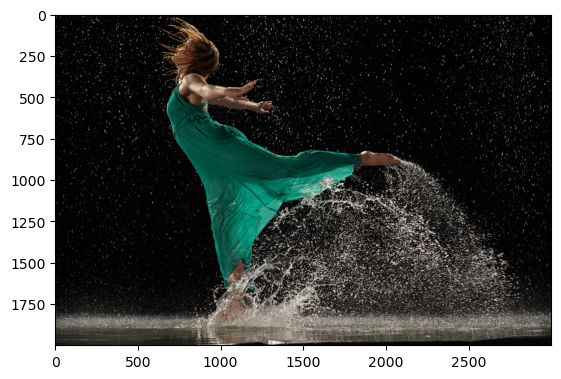

In [139]:
# Escolho a imagem que vai ser utilizada e mostro ela
imagem = Image.open("./imagens/DancingInWater.jpg")

print(imagem.mode)
print(imagem.format)
print(imagem.size)
imshow(imagem)
print("Imagem Escolhida: ")

In [140]:
# Transformar a imagem em uma matriz com valores RGB
def matriz_RGB(imagem, coresRGB):
    linha = []
    coluna = 0
    for cor_rgb in imagem.getdata(): 
        linha.append(cor_rgb)
        if(coluna == imagem.size[0] - 1):
            coresRGB.append(linha)
            coluna = -1
            linha = []
        coluna += 1
    return coresRGB

In [141]:
# Pego a imagem e transformo em uma matriz com valores RGB e guardo em um vetor 
Imagem_antes = []
matriz_RGB(imagem, Imagem_antes)

print()

In [142]:
# Função para transformar de RGB para HSV
def rgbToHSV(r, g, b):
 
    maxc = max(r, g, b)
    minc = min(r, g, b)
    colorMap = {
        id(r): 'r',
        id(g): 'g',
        id(b): 'b'
    }
    if colorMap[id(maxc)] == colorMap[id(minc)]:
        h = 0
    elif colorMap[id(maxc)] == 'r':
        h = 60.0 * ((g - b) / (maxc - minc)) % 360.0
    elif colorMap[id(maxc)] == 'g':
        h = 60.0 * ((b - r) / (maxc - minc)) + 120.0
    elif colorMap[id(maxc)] == 'b':
        h = 60.0 * ((r - g) / (maxc - minc)) + 240.0
    v = maxc
    if maxc == 0.0:
        s = 0.0
    else:
        s = 1.0 - (minc / maxc)
    return (h, s, v)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Imagem em HSV


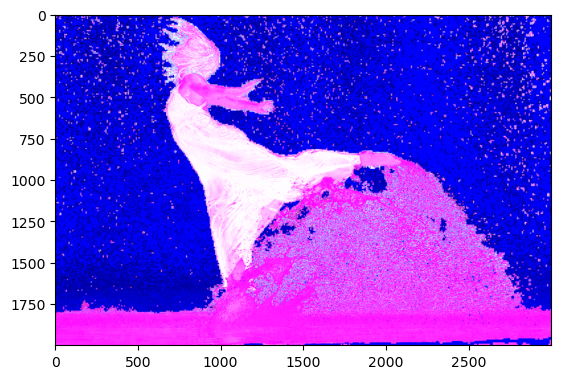

In [143]:
# Altera cada pixel de RGB para HSV e guardo em um vetor
Imagem_HSV = []

for linha in Imagem_antes:
    vetor = []
    for rgb in linha:
        r = rgb[0]
        g = rgb[1]
        b = rgb[2]
        h, s, v = rgbToHSV(r, g, b)
        vetor.append((h,s,v))
        
    Imagem_HSV.append(vetor)
    
imshow(Imagem_HSV)
print("Imagem em HSV")

In [144]:
# Função para transformar de HSV para RGB
def hsvToRGB(h, s, v):

    import math
    hi = math.floor(h / 60.0) % 6
    f =  (h / 60.0) - math.floor(h / 60.0)
    p = v * (1.0 - s)
    q = v * (1.0 - (f*s))
    t = v * (1.0 - ((1.0 - f) * s))
    return {
        0: (v, t, p),
        1: (q, v, p),
        2: (p, v, t),
        3: (p, q, v),
        4: (t, p, v),
        5: (v, p, q),
    }[hi]

In [145]:
# Função para ver se os pixels estão no limite do RGB
def Arredondar(r, g, b):
    if r < 0.0:
        r = 0.0
    if g < 0.0:
        g = 0.0
    if b < 0.0:
        b = 0.0
    if r > 255:
        r = 255
    if g > 255:
        g = 255
    if b > 255:
        b = 255

    return (r, g, b)

Imagem de volta em RGB


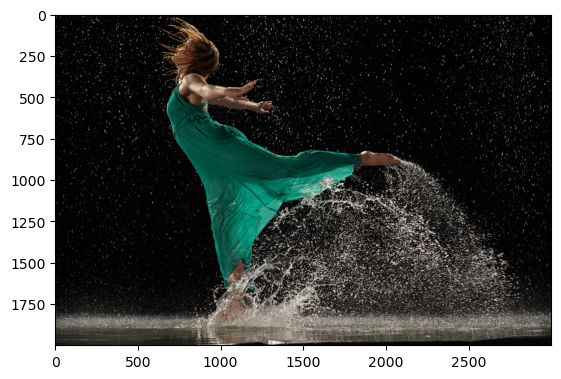

In [147]:
# Transformar de volta para RGB
Imagem_depois = []

for linha in Imagem_HSV:    
    vetor = []
    for hsv in linha:
        h = hsv[0]
        s = hsv[1]
        v = hsv[2]
        
        r, g, b = hsvToRGB(h, s, v)
        r, g, b = Arredondar(r, g, b)
        r, g, b = int(round(r)), int(round(g)), int(round(b))
        
        hsv2 = (r,g,b)
        vetor.append(hsv2)
    Imagem_depois.append(vetor)
    
imshow(Imagem_depois) 
print("Imagem de volta em RGB")

In [ ]:
Questão 2 - Alteração de matiz e saturação no HSB, com posterior conversão a RGB.

Imagem base escolhida: 


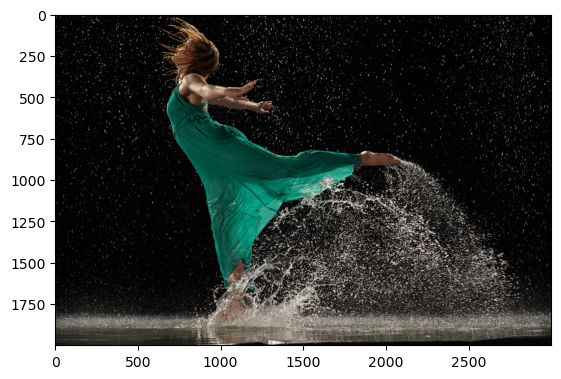

In [9]:
# Imagem escolhida
imagem2 = Image.open("./imagens/DancingInWater.jpg")

imshow(imagem2)
print("Imagem base escolhida: ")

In [10]:
# Transformar a imagem em uma matriz com valores RGB
def matriz_RGB(imagem, coresRGB):
    linha = []
    coluna = 0
    for cor_rgb in imagem.getdata():  
        linha.append(cor_rgb)
        if(coluna == imagem.size[0] - 1):
            coresRGB.append(linha)
            coluna = -1
            linha = []
        coluna += 1
    return coresRGB

In [11]:
# Pego a imagem e transformo em uma matriz com valores RGB e guardo em um vetor  
Imagem_antes2 = []
matriz_RGB(imagem2, Imagem_antes2)

print()

In [18]:
# Função para transformar de RGB para HSV com matiz = 0 e saturação = 1
def Mudar_Matiz_e_Saturação(r, g, b):

    maxc = max(r, g, b)
    minc = min(r, g, b)

    h = 120.0 
    s = 1.0  
    v = maxc
    return (h, s, v)


In [13]:
# Função para transformar de RGB para HSV
def rgbToHSV(r, g, b):
 
    maxc = max(r, g, b)
    minc = min(r, g, b)
    colorMap = {
        id(r): 'r',
        id(g): 'g',
        id(b): 'b'
    }
    if colorMap[id(maxc)] == colorMap[id(minc)]:
        h = 0
    elif colorMap[id(maxc)] == 'r':
        h = 60.0 * ((g - b) / (maxc - minc)) % 360.0
    elif colorMap[id(maxc)] == 'g':
        h = 60.0 * ((b - r) / (maxc - minc)) + 120.0
    elif colorMap[id(maxc)] == 'b':
        h = 60.0 * ((r - g) / (maxc - minc)) + 240.0
    v = maxc
    if maxc == 0.0:
        s = 0.0
    else:
        s = 1.0 - (minc / maxc)
    return (h, s, v)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Imagem em HSV com H = 0 e Saturação = 1


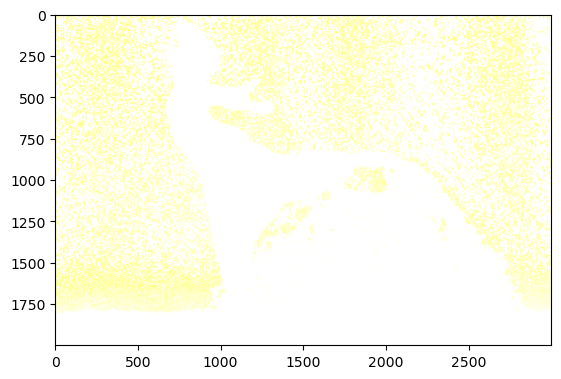

In [19]:
# Altera cada pixel de RGB para HSV e guardo em um vetor
Imagem_HSV2 = []

for linha in Imagem_antes2: 
    vetor = []
    for rgb in linha:
        r = rgb[0]
        g = rgb[1]
        b = rgb[2]
        h, s, v = Mudar_Matiz_e_Saturação(r, g, b)
        vetor.append((h,s,v))
        
    Imagem_HSV2.append(vetor)
    
imshow(Imagem_HSV2)
print("Imagem em HSV com H = 0 e Saturação = 1")

In [20]:
# Função para transformar de HSV para RGB
def hsvToRGB(h, s, v):

    import math
    hi = math.floor(h / 60.0) % 6
    f =  (h / 60.0) - math.floor(h / 60.0)
    p = v * (1.0 - s)
    q = v * (1.0 - (f*s))
    t = v * (1.0 - ((1.0 - f) * s))
    return {
        0: (v, t, p),
        1: (q, v, p),
        2: (p, v, t),
        3: (p, q, v),
        4: (t, p, v),
        5: (v, p, q),
    }[hi]

In [21]:
# Função para ver se os pixels estão no limite do RGB
def Arredondar(r, g, b):
    if r < 0.0:
        r = 0.0
    if g < 0.0:
        g = 0.0
    if b < 0.0:
        b = 0.0
    if r > 255:
        r = 255
    if g > 255:
        g = 255
    if b > 255:
        b = 255

    return (r, g, b)

Imagem convertida do HSV com H = 0(Vermelho) e S = 1 de volta para RGB


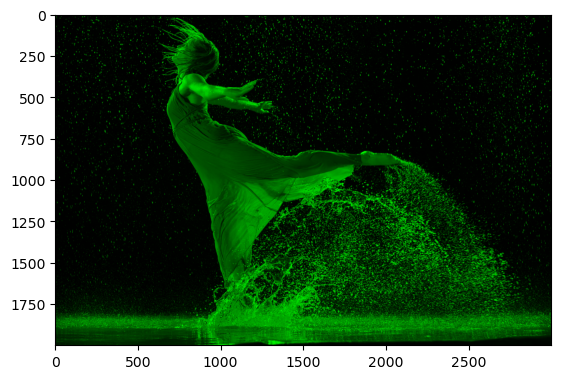

In [22]:
# Transformando de volta para RGB
Imagem_depois2 = []

for linha in Imagem_HSV2:    
    vetor = []
    for hsv in linha:
        h = hsv[0]
        s = hsv[1]
        v = hsv[2]
        
        r, g, b = hsvToRGB(h, s, v)
        r, g, b = Arredondar(r, g, b)
        r, g, b = int(round(r)), int(round(g)), int(round(b))
        
        hsv3 = (r,g,b)
        vetor.append(hsv3)
    Imagem_depois2.append(vetor)
    
imshow(Imagem_depois2) 
print("Imagem convertida do HSV com H = 0(Vermelho) e S = 1 de volta para RGB")

In [ ]:
Questão 3 - Negativo. Duas formas de aplicação devem ser testadas: em RGB (banda a banda) e
na banda V do HSV, com posterior conversão para RGB.

Imagem Normal: 


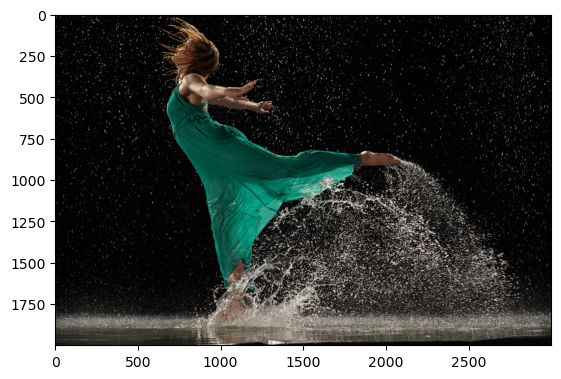

In [167]:
# Imagem escolhida
imagem3 = Image.open("./imagens/DancingInWater.jpg")

imshow(imagem3)
print("Imagem Normal: ")

In [179]:
# Pego a imagem e transformo em uma matriz com valores RGB e guardo em um vetor  
Negativo = []
matriz_RGB(imagem3, Negativo)

print()

In [180]:
# Função que pega a matriz com valores RGB e transfoma em valores RGB negativos
def RGB_negativo(imagem):
    coresNegativo = []
    for linha in imagem:    
        vetor = []
        for rgb in linha:
            r = 255 - rgb[0]
            g = 255 - rgb[1]
            b = 255 - rgb[2]
            rgb2 = (r,g,b)
            vetor.append(rgb2)
        coresNegativo.append(vetor)
    return coresNegativo

Imagem RGB negativa:


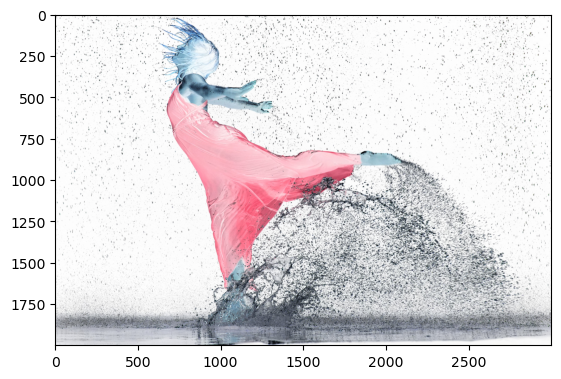

In [181]:
# Transformo os valores RGB em RGB negativos e mostro na tela
imagem_negativa = RGB_negativo(Negativo)  

imshow(imagem_negativa)
print("Imagem RGB negativa:")

In [182]:
# Transformando de RGB para HSV
def rgbToHSV(r, g, b):
 
    maxc = max(r, g, b)
    minc = min(r, g, b)
    colorMap = {
        id(r): 'r',
        id(g): 'g',
        id(b): 'b'
    }
    if colorMap[id(maxc)] == colorMap[id(minc)]:
        h = 0
    elif colorMap[id(maxc)] == 'r':
        h = 60.0 * ((g - b) / (maxc - minc)) % 360.0
    elif colorMap[id(maxc)] == 'g':
        h = 60.0 * ((b - r) / (maxc - minc)) + 120.0
    elif colorMap[id(maxc)] == 'b':
        h = 60.0 * ((r - g) / (maxc - minc)) + 240.0
    v = maxc
    if maxc == 0.0:
        s = 0.0
    else:
        s = 1.0 - (minc / maxc)
    return (h, s, v)

In [183]:
Imagem_antes3 = []
matriz_RGB(imagem3, Imagem_antes3)

print()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Imagem convertida do RGB - HSV 


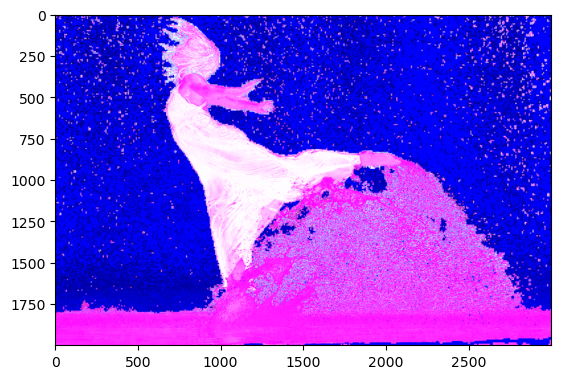

In [184]:
Imagem_HSV = []
for linha in RGBantes3:   #transformando em HSV
    vetor = []
    for rgb in linha:
        r = rgb[0]
        g = rgb[1]
        b = rgb[2]
        h, s, v = rgbToHSV(r, g, b)
        vetor.append((h,s,v))
        
    Imagem_HSV.append(vetor)
    
imshow(Imagem_HSV)
print("Imagem convertida do RGB - HSV ")

In [185]:
# Função para transformar de HSV para RGB com a banda V negativa
def rgbToHSV2(r, g, b):
 
    maxc = max(r, g, b)
    minc = min(r, g, b)
    colorMap = {
        id(r): 'r',
        id(g): 'g',
        id(b): 'b'
    }
    if colorMap[id(maxc)] == colorMap[id(minc)]:
        h = 0
    elif colorMap[id(maxc)] == 'r':
        h = 60.0 * ((g - b) / (maxc - minc)) % 360.0
    elif colorMap[id(maxc)] == 'g':
        h = 60.0 * ((b - r) / (maxc - minc)) + 120.0
    elif colorMap[id(maxc)] == 'b':
        h = 60.0 * ((r - g) / (maxc - minc)) + 240.0
    v = 255.0 - maxc
    if maxc == 0.0:
        s = 0.0
    else:
        s = 1.0 - (minc / maxc)
    return (h, s, v)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Imagem convertida do RGB - HSV com V negativo


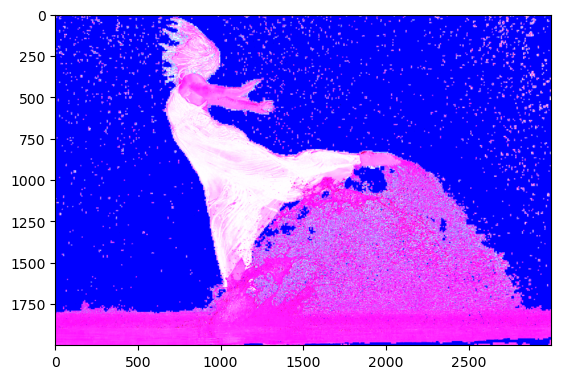

In [186]:
# Pego a imagem e transformo para HSV com o V negativo
Imagem_V_negativo = []

for linha in RGBantes3:  
    vetor = []
    for rgb in linha:
        r = rgb[0]
        g = rgb[1]
        b = rgb[2]
        h, s, v = rgbToHSV2(r, g, b)
        vetor.append((h,s,v))
        
    Imagem_V_negativo.append(vetor)
    
imshow(Imagem_V_negativo)
print("Imagem convertida do RGB - HSV com V negativo")

In [188]:
def hsvToRGB(h, s, v):

    import math
    hi = math.floor(h / 60.0) % 6
    f =  (h / 60.0) - math.floor(h / 60.0)
    p = v * (1.0 - s)
    q = v * (1.0 - (f*s))
    t = v * (1.0 - ((1.0 - f) * s))
    return {
        0: (v, t, p),
        1: (q, v, p),
        2: (p, v, t),
        3: (p, q, v),
        4: (t, p, v),
        5: (v, p, q),
    }[hi]

In [189]:
# Função para ver se os pixels estão no limite do RGB
def Arredondar(r, g, b):
    if r < 0.0:
        r = 0.0
    if g < 0.0:
        g = 0.0
    if b < 0.0:
        b = 0.0
    if r > 255:
        r = 255
    if g > 255:
        g = 255
    if b > 255:
        b = 255

    return (r, g, b)

Imagem convertida do HSV com banda V negativa de volta para RGB


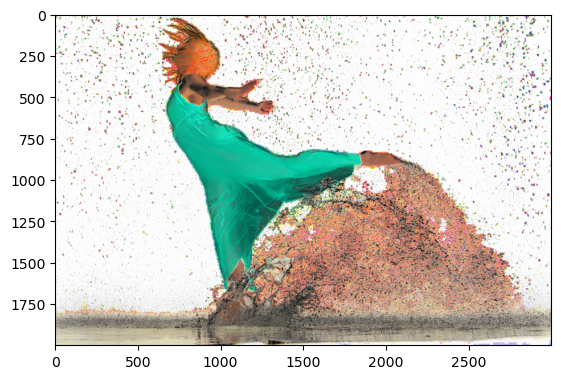

In [190]:
#transformando de volta para RGB com banda V negativa
Imagem_depois3 = []

for linha in Imagem_V_negativo:    
    vetor = []
    for hsv in linha:
        h = hsv[0]
        s = hsv[1]
        v = hsv[2]
        
        r, g, b = hsvToRGB(h, s, v)
        r, g, b = Arredondar(r, g, b)
        r, g, b = int(round(r)), int(round(g)), int(round(b))
        
        hsv4 = (r,g,b)
        vetor.append(hsv4)
    Imagem_depois3.append(vetor)
    
imshow(Imagem_depois3) 
print("Imagem convertida do HSV com banda V negativa de volta para RGB")

In [ ]:
Questão 4 - Correlação m x n com stride (passo), sobre R, G e B, com m, n, stride e filtro definidos
em um arquivo (txt) a parte. Teste com filtros Box e Sobel, e explicar os resultados.
Não utilize nenhum tipo de extensão. Compare Box15x1(Box1x15(imagem)) com 
Box15x15(imagem), em termos de resultado e tempo de processamento. Para 
visualização do Sobel, aplique valor absoluto seguido por expansão de histograma 
para [0, 255].

In [4]:
# Escolha a imagem e guardo o array dela em uma nova variavel
imagem13 = Image.open("./imagens/Shapes.png")
imagem_array13 = np.array(imagem13)

In [5]:
# Leio e guardo os parâmetros do arquivo
with open('media.txt', 'r') as file:
    m = int(file.readline().strip())
    n = int(file.readline().strip())
    stride = int(file.readline().strip())
    filter_data = []
    for line in file:
        filter_data.append([float(x) for x in line.strip().split()])

In [6]:
# Obtenho as dimensões da imagem e coloco na matriz de saída
altura, largura, canais = imagem_array13.shape

altura_saida = (altura - m) // stride + 1
largura_saida = (largura - n) // stride + 1

saida13 = np.zeros((altura_saida, largura_saida, canais))

In [7]:
# Realizo a correlação
for i in range(0, altura - m + 1, stride):
    for j in range(0, largura - n + 1, stride):
        janela = imagem_array13[i:i+m, j:j+n]
        for c in range(canais):
            saida13[i // stride, j // stride, c] = np.sum(janela[:, :, c] * filter_data)

Imagem após o filtro box 1 por 10 ser aplicado


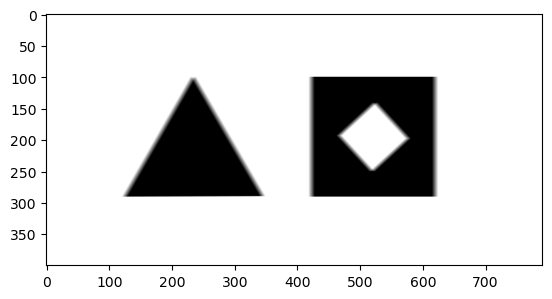

In [8]:
# Converter a matriz de saída de volta para uma imagem e mostrar na tela
saida_imagem13 = Image.fromarray(np.uint8(saida13))
imshow(saida_imagem13) 
print("Imagem após o filtro box 1 por 10 ser aplicado")

In [102]:
# Escolha a imagem e guardo o array dela em uma nova variavel
imagem20 = Image.open("./imagens/Shapes.png")
imagem_array20 = np.array(imagem20)

In [103]:
# Leio e guardo os parâmetros do arquivo
with open('sobel_vertical.txt', 'r') as file:
    m = int(file.readline().strip())
    n = int(file.readline().strip())
    stride = int(file.readline().strip())
    filter_data = []
    for line in file:
        filter_data.append([float(x) for x in line.strip().split()])

In [104]:
# Obtenho as dimensões da imagem e coloco na matriz de saída
altura, largura, canais = imagem_array20.shape

altura_saida = (altura - m) // stride + 1
largura_saida = (largura - n) // stride + 1

saida20 = np.zeros((altura_saida, largura_saida, canais))

In [105]:
# Realizo a correlação
for i in range(0, altura - m + 1, stride):
    for j in range(0, largura - n + 1, stride):
        janela = imagem_array2[i:i+m, j:j+n]
        for c in range(canais):
            saida20[i // stride, j // stride, c] = np.sum(janela[:, :, c] * filter_data)
            
# Aplicar valor absoluto
saida20 = np.abs(saida20)

# Expandir o histograma para o intervalo [0, 255]
saida_min = np.min(saida)
saida_max = np.max(saida)
saida20 = ((saida20 - saida_min) / (saida_max - saida_min)) * 255

Imagem após o filtro sobel vertical ser aplicado


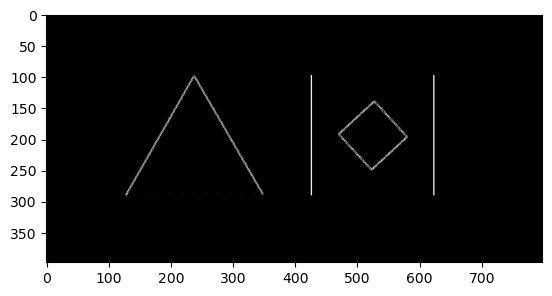

In [106]:
# Converter a matriz de saída de volta para uma imagem e mostrar na tela
saida_imagem20 = Image.fromarray(np.uint8(saida20))
imshow(saida_imagem20) 
print("Imagem após o filtro sobel vertical ser aplicado")

In [112]:
# Escolha a imagem e guardo o array dela em uma nova variavel
imagem3 = Image.open("./imagens/Shapes.png")
imagem_array3 = np.array(imagem3)

In [113]:
# Leio e guardo os parâmetros do arquivo
with open('sobel_horizontal.txt', 'r') as file:
    m = int(file.readline().strip())
    n = int(file.readline().strip())
    stride = int(file.readline().strip())
    filter_data = []
    for line in file:
        filter_data.append([float(x) for x in line.strip().split()])

In [114]:
# Obtenho as dimensões da imagem e coloco na matriz de saída
altura, largura, canais = imagem_array3.shape

altura_saida = (altura - m) // stride + 1
largura_saida = (largura - n) // stride + 1

saida = np.zeros((altura_saida, largura_saida, canais))

In [115]:
# Realizo a correlação
for i in range(0, altura - m + 1, stride):
    for j in range(0, largura - n + 1, stride):
        janela = imagem_array3[i:i+m, j:j+n]
        for c in range(canais):
            saida[i // stride, j // stride, c] = np.sum(janela[:, :, c] * filter_data)
            
# Aplicar valor absoluto
saida = np.abs(saida)

# Expandir o histograma para o intervalo [0, 255]
saida_min = np.min(saida)
saida_max = np.max(saida)
saida = ((saida - saida_min) / (saida_max - saida_min)) * 255

Imagem após o filtro sobel horizontal ser aplicado


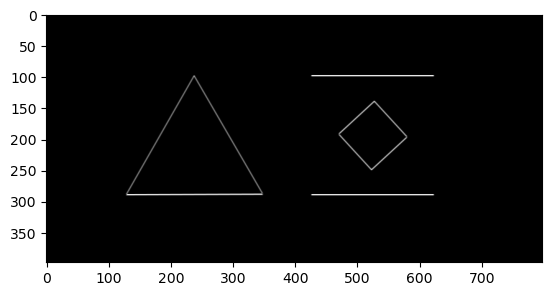

In [116]:
# Converter a matriz de saída de volta para uma imagem e mostrar na tela
saida_imagem3 = Image.fromarray(np.uint8(saida))
imshow(saida_imagem3) 
print("Imagem após o filtro sobel horizontal ser aplicado")

In [37]:
# Escolha a imagem e guardo o array dela em uma nova variavel
imagem4 = Image.open("./imagens/Shapes.png")
imagem_array4 = np.array(imagem4)

In [38]:
# Leio e guardo os parâmetros do arquivo
with open('box15_15.txt', 'r') as file:
    m = int(file.readline().strip())
    n = int(file.readline().strip())
    stride = int(file.readline().strip())
    filter_data = []
    for line in file:
        filter_data.append([float(x) for x in line.strip().split()])

In [39]:
# Obtenho as dimensões da imagem e coloco na matriz de saída
altura, largura, canais = imagem_array4.shape

altura_saida = (altura - m) // stride + 1
largura_saida = (largura - n) // stride + 1

saida = np.zeros((altura_saida, largura_saida, canais))

In [40]:
# Realizo a correlação e imprimo o tempo
import time

inicio = time.time()
for i in range(0, altura - m + 1, stride):
    for j in range(0, largura - n + 1, stride):
        janela = imagem_array4[i:i+m, j:j+n]
        for c in range(canais):
            saida[i // stride, j // stride, c] = np.sum(janela[:, :, c] * filter_data)
fim = time.time()
print(fim - inicio)

20.91745114326477


Imagem após o box 15x15 ser aplicado


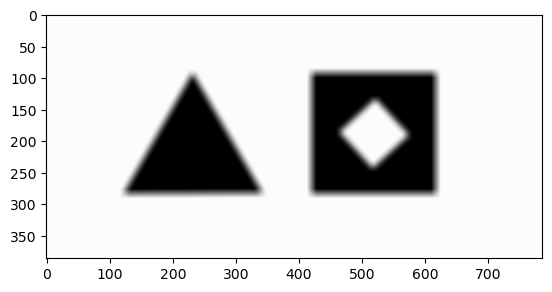

In [41]:
# Converter a matriz de saída de volta para uma imagem e mostrar na tela
saida_imagem4 = Image.fromarray(np.uint8(saida))
imshow(saida_imagem4) 
print("Imagem após o box 15x15 ser aplicado")

In [42]:
# Escolha a imagem e guardo o array dela em uma nova variavel
imagem5 = Image.open("./imagens/Shapes.png")
imagem_array5 = np.array(imagem5)

In [43]:
# Leio e guardo os parâmetros do arquivo
with open('box15_1.txt', 'r') as file:
    m = int(file.readline().strip())
    n = int(file.readline().strip())
    stride = int(file.readline().strip())
    filter_data = []
    for line in file:
        filter_data.append([float(x) for x in line.strip().split()])

In [44]:
# Obtenho as dimensões da imagem e coloco na matriz de saída
altura, largura, canais = imagem_array5.shape

altura_saida = (altura - m) // stride + 1
largura_saida = (largura - n) // stride + 1

saida = np.zeros((altura_saida, largura_saida, canais))

In [45]:
# Realizo a correlação e imprimo o tempo
import time

inicio = time.time()
for i in range(0, altura - m + 1, stride):
    for j in range(0, largura - n + 1, stride):
        janela = imagem_array5[i:i+m, j:j+n]
        for c in range(canais):
            saida[i // stride, j // stride, c] = np.sum(janela[:, :, c] * filter_data)
fim = time.time()
tempo = fim - inicio

Imagem após o box 15x1 ser aplicado


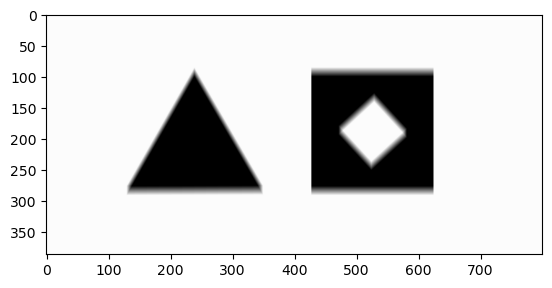

In [46]:
# Converter a matriz de saída de volta para uma imagem e mostrar na tela
saida_imagem5 = Image.fromarray(np.uint8(saida))
imshow(saida_imagem5) 
print("Imagem após o box 15x1 ser aplicado")
saida_imagem5.save('saida_box_15x1_.jpg')

In [47]:
# Escolha a imagem e guardo o array dela em uma nova variavel
imagem6 = Image.open("./saida_box_15x1_.jpg")
imagem_array6 = np.array(imagem6)

In [48]:
# Leio e guardo os parâmetros do arquivo
with open('box1_15.txt', 'r') as file:
    m = int(file.readline().strip())
    n = int(file.readline().strip())
    stride = int(file.readline().strip())
    filter_data = []
    for line in file:
        filter_data.append([float(x) for x in line.strip().split()])

In [49]:
# Obtenho as dimensões da imagem e coloco na matriz de saída
altura, largura, canais = imagem_array6.shape

altura_saida = (altura - m) // stride + 1
largura_saida = (largura - n) // stride + 1

saida = np.zeros((altura_saida, largura_saida, canais))

In [50]:
# Realizo a correlação e imprimo o tempo
import time

inicio = time.time()
for i in range(0, altura - m + 1, stride):
    for j in range(0, largura - n + 1, stride):
        janela = imagem_array6[i:i+m, j:j+n]
        for c in range(canais):
            saida[i // stride, j // stride, c] = np.sum(janela[:, :, c] * filter_data)
fim = time.time()
tempo += fim - inicio
print(tempo)

23.806896924972534


Imagem após o box 15x1 e o 1x15 ser aplicado


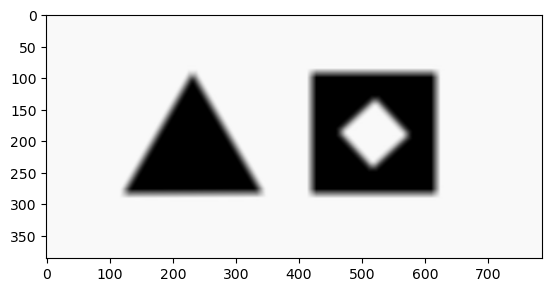

In [51]:
# Converter a matriz de saída de volta para uma imagem e mostrar na tela
saida_imagem6 = Image.fromarray(np.uint8(saida))
imshow(saida_imagem6) 
print("Imagem após o box 15x1 e o 1x15 ser aplicado")